### [3 x n 타일링](https://school.programmers.co.kr/learn/courses/30/lessons/12902?language=python3)

- 점화식 기반으로 재귀적으로 풀이 -> 큰 n을 대상으로 할 경우 시간초과

In [7]:
def solution(n):
    
    if n == 0:
        return 1
    if n == 2:
        return 3
    if n < 2:
        return 0

    # 점화식: T(n) = 3 * T(n-2) + 2 * (T(n-4) + T(n-6) + ...)
    result = 3 * solution(n - 2)
    i = 4
    while i <= n:
        result += 2 * solution(n - i)
        i += 2
    
    return result % 1_000_000_007

- DP를 이용해 조금 더 최적화  
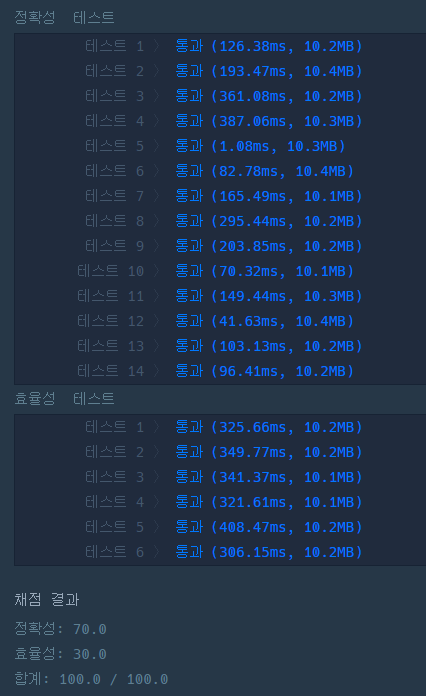

In [3]:
def solution(n):
    if n % 2 != 0:
        return 0  # 홀수일 경우 타일을 채울 수 없으므로 0 반환

    MOD = 1_000_000_007

    # DP 테이블 초기화
    dp = [0] * (n + 1)
    dp[0] = 1  # 아무 타일도 놓지 않은 경우는 1가지
    if n >= 2:
        dp[2] = 3  # 2칸을 채우는 방법은 3가지
    
    for i in range(4, n + 1, 2):
        dp[i] = dp[i - 2] * 3
        for j in range(4, i + 1, 2):
            dp[i] += dp[i - j] * 2
        dp[i] %= MOD  # 나머지 연산

    return dp[n] % 1_000_000_007

41


- 다른 사람의 풀이....감탄...

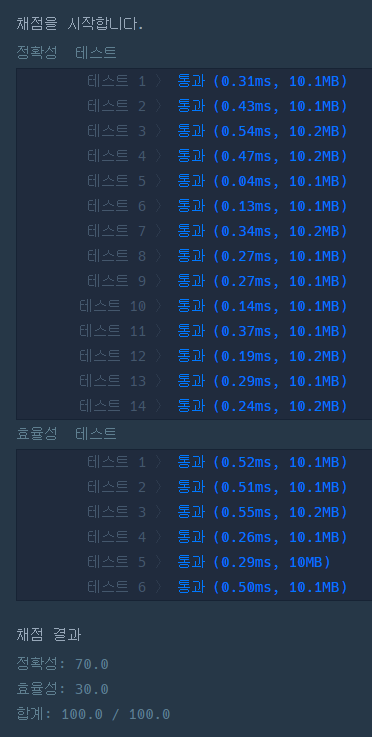

In [10]:
def solution(n):
    if n % 2:
        return 0
    front = back = 1
    for _ in range(n//2):
        front, back = back, (4*back - front) % 1000000007
    return back

- 위 코드에 사용된 수식은 아래와 같음.  
T(n)=4×T(n−2)−T(n−4)

### [퍼즐 게임 챌린지](https://school.programmers.co.kr/learn/courses/30/lessons/340212)

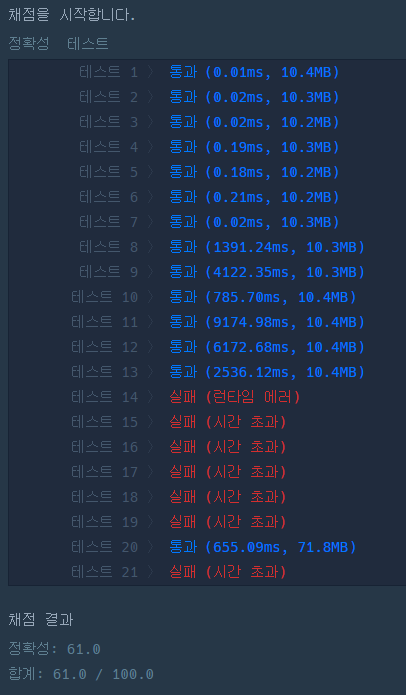

In [62]:
def solution(diffs, times, limit):
    target = [[diff, time, times[idx-1]] for idx, (diff, time) in enumerate(zip(diffs, times))]
    target = sorted(target, key=lambda x: x[0], reverse=True)
    
    for level in sorted(diffs, reverse=True):
        spend = sum([cur_time if diff <= level else (cur_time+prev_time)*(diff-level)+cur_time for diff, cur_time, prev_time in target])
        if spend <= limit:    
            n = 0
            while True:
                if spend == limit:
                    return level
                elif spend < limit:
                    # 다음 문제가 풀렸을 때의 난이도 하락분
                    while True:
                        diff, cur_time, prev_time = target[n]
                        if diff < level:
                            n -= 1
                            diff, cur_time, prev_time = target[n]
                            next_gap = (cur_time+prev_time)*(diff-level)+cur_time
                            if spend < limit:
                                break
                            elif spend - next_gap < limit:
                                level = diff
                            break
                        n += 1

                    level -= 1
                    
                elif spend > limit:
                    return level+1
                    
                spend = sum([cur_time if diff <= level else (cur_time+prev_time)*(diff-level)+cur_time for diff, cur_time, prev_time in target])
            

- 이분 탐색을 이용해 처리

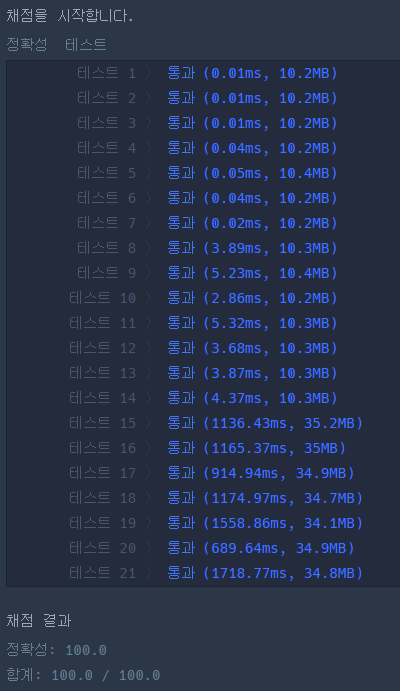

In [56]:
def solution(diffs, times, limit):
    # 소요 시간을 계산하는 함수
    def calculate_time(level):
        total_time = 0
        n = len(diffs)
        
        for i in range(n):
            diff = diffs[i]
            time_cur = times[i]
            time_prev = times[i - 1] if i > 0 else 0
            
            if diff <= level:
                total_time += time_cur
            else:
                mistakes = diff - level
                total_time += mistakes * (time_cur + time_prev) + time_cur
            
            if total_time > limit:
                return total_time  # 시간 초과시 바로 리턴
        
        return total_time
    
    # 이분 탐색
    left, right = 1, max(diffs)
    answer = right
    
    while left <= right:
        mid = (left + right) // 2
        if calculate_time(mid) <= limit:
            answer = mid
            right = mid - 1
        else:
            left = mid + 1
        
        print(right, left)
    
    return answer


In [58]:
diffs, times, limit = [1, 99999, 100000, 99995], [9999, 9001, 9999, 9001], 3456789012
solution(diffs, times, limit)

49999 1
49999 25001
49999 37501
43749 37501
40624 37501
40624 39063
39842 39063
39451 39063
39451 39258
39353 39258
39353 39306
39353 39330
39353 39342
39353 39348
39353 39351
39353 39353
39353 39354


39354